In [ ]:
# mount to google driver in order to use data
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
# import section
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
!ls

drive  sample_data


In [ ]:
Test_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Test_IDs.csv')
Train_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Train_IDs.csv')
demographics = pd.read_csv('/content/drive/MyDrive/HTML final project/demographics.csv')
location = pd.read_csv('/content/drive/MyDrive/HTML final project/location.csv')
population = pd.read_csv('/content/drive/MyDrive/HTML final project/population.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/HTML final project/sample_submission.csv')
satisfaction = pd.read_csv('/content/drive/MyDrive/HTML final project/satisfaction.csv')
services = pd.read_csv('/content/drive/MyDrive/HTML final project/services.csv')
status = pd.read_csv('/content/drive/MyDrive/HTML final project/status.csv')

data = pd.read_csv('/content/drive/MyDrive/HTML final project/data.csv')
new_data = pd.read_csv('/content/drive/MyDrive/HTML final project/data.csv')



,Customer ID,Total Revenue,Satisfaction Score
0,1746-TGTWV,59.65,NaN
1,5832-EXGTT,2995.07,2.0
2,3458-IDMFK,85.73,2.0
3,3196-NVXLZ,1510.95,1.0
4,3522-CDKHF,2617.45,2.0
...,...,...,...
2167,9114-DPSIA,4523.55,4.0
2168,3199-NPKCN,1774.31,4.0
2169,3329-WDIOK,3936.58,3.0
2170,4835-YSJMR,2807.47,3.0


In [ ]:

#Use satisfaction score , try to predict the answer
#Merge two dataframes and replace answer string to code

result = pd.merge(Train_IDs, status, on="Customer ID")
temp = satisfaction.fillna(2.5)
result = pd.merge(result , temp , on = "Customer ID")




replace_dir = {"Churn Category" : {"No Churn":0 , "Competitor":1 , "Dissatisfaction":2 , "Attitude" : 3 , "Price" : 4 , "Other" : 5}}
result = result.replace(replace_dir)

X = result["Satisfaction Score"]
Y = result['Churn Category']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsOneClassifier

from lightgbm import LGBMClassifier
X = np.array(result["Satisfaction Score"]).reshape(-1, 1)
Y = np.array(result['Churn Category']).reshape(-1, 1)



temp = satisfaction.fillna(2.5)



test = pd.merge(sample_submission["Customer ID"].to_frame(), temp , on = "Customer ID" , how ='inner')



test_X = np.array(test["Satisfaction Score"]).reshape(-1, 1)
# ===== One VS ALL ======
# 1. SVC
# 2. LogisticRegression
# 3. Percetron
#clf = OneVsRestClassifier(SVC()).fit(X, Y)

# ==== One vs One ====
# clf = OneVsOneClassifier(SVC()).fit(X, Y)
# ====================

# ==== KNN =====
from sklearn.neighbors import KNeighborsClassifier
clf = LGBMClassifier().fit(X, Y)


# =======================
y_hat= clf.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tmp = test.drop(["Satisfaction Score"], axis=1)
tmp["Churn Category"] = y_hat.astype(int)
t = pd.merge(sample_submission["Customer ID"].to_frame(), tmp , on = "Customer ID" , how ='outer')
t = t.fillna(0)

t["Churn Category"]= t["Churn Category"].astype(int)

In [ ]:


t.to_csv("lgbm.csv", index=False)

# Use Top 5 Features



In [ ]:
"""
Feature     Covariance 
-----------------------------
Total Revenue	0.187181
Dependents	0.199152
Number of Referrals	0.219683
Tenure in Months	0.287249
Satisfaction Score 0.568598
"""

top_5 = data[["Customer ID","Total Revenue", "Dependents", "Number of Referrals", "Tenure in Months" , "Satisfaction Score"]]


result = pd.merge(Train_IDs, status, on="Customer ID" , how = 'left')


replace_dir = {"Churn Category" : {"No Churn":0 , "Competitor":1 , "Dissatisfaction":2 , "Attitude" : 3 , "Price" : 4 , "Other" : 5}}
result = result.replace(replace_dir)

#result = result.fillna(result.median())

train_Y = np.array(result['Churn Category']).reshape(-1, 1)



train = pd.merge(Train_IDs["Customer ID"].to_frame(), top_5 , on = "Customer ID" , how ='left')
#train = train.fillna(train.median())
train = pd.merge(train, result , on = "Customer ID" , how ='inner')
features = ["Tenure in Months" , "Satisfaction Score"]

train_X = np.array(train[features]).reshape(-1, len(features))



test = pd.merge(Test_IDs["Customer ID"].to_frame(), top_5 , on = "Customer ID" , how ='left')
test= test.fillna(test.median())
test_X = np.array(test[features]).reshape(-1, len(features))





In [ ]:
"""
Feature     Covariance 
-----------------------------
Total Revenue	0.187181
Dependents	0.199152
Number of Referrals	0.219683
Tenure in Months	0.287249
Satisfaction Score 0.568598
"""

all = data.iloc[:, 1:]

result = pd.merge(Train_IDs, status, on="Customer ID" , how = 'left')


replace_dir = {"Churn Category" : {"No Churn":0 , "Competitor":1 , "Dissatisfaction":2 , "Attitude" : 3 , "Price" : 4 , "Other" : 5}}
result = result.replace(replace_dir)

result = result.fillna(result.median())

train_Y = np.array(result['Churn Category']).reshape(-1, 1)



train = pd.merge(Train_IDs["Customer ID"].to_frame(), all , on = "Customer ID" , how ='left')
train = train.fillna(train.median())
train = pd.merge(train, result , on = "Customer ID" , how ='inner')


train_X = np.array(train.iloc[:,1:-1]).reshape(-1, len(train.columns)-2)



test = pd.merge(Test_IDs["Customer ID"].to_frame().astype(str), all.astype(str) , on = "Customer ID" , how ='left')
test= test.fillna(test.median())
test_X = np.array(test.iloc[:,1:]).reshape(-1, len(train.columns)-2)


In [ ]:
test

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Category
0,9938-EKRGF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7379-POKDZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0654-HMSHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2045-BMBTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0701-TJSEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4587-VVTOX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1405,7716-YTYHG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,7649-PHJVR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,7855-DIWPO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_X

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [ ]:
test.columns

Index(['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Country', 'State',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Category'],
      dtype='object')

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier

#clf = RandomForestClassifier(max_depth=3, random_state=0).fit(train_X, train_Y)
clf = LGBMClassifier(num_leaves=80).fit(train_X, train_Y)




#clf = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_Y)

NameError: ignored

In [ ]:
y_hat= clf.predict(test_X)

In [ ]:
dir = {i:0 for i in range(6)}
for i in y_hat:
  dir[i]+=1
for i in dir:
  print(i,dir[i])

0 1409
1 0
2 0
3 0
4 0
5 0


In [ ]:
result

,Customer ID,Churn Category
0,0650-BWOZN,1.0
1,0562-FGDCR,1.0
2,6688-UZPWD,0.0
3,2905-KFQUV,1.0
4,9720-JJJOR,0.0
...,...,...
5629,1178-PZGAB,-1.0
5630,4806-KEXQR,-1.0
5631,8809-RIHDD,0.0
5632,6663-JOCQO,0.0


In [ ]:

t = sample_submission["Customer ID"].to_frame()


t["Churn Category"]= y_hat.astype(int)
t = t.fillna(0)

In [ ]:
t.to_csv("KNN_all.csv", index=False)

#12.23

In [ ]:
data.columns.tolist()

['Unnamed: 0',
 'Customer ID',
 'Count',
 'Gender',
 'Age',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents',
 'Country',
 'State',
 'City',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Population',
 'Quarter',
 'Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Satisfaction Score',
 'Churn Category']

In [ ]:

## 12/23
"""
all = [
  'Customer ID',
'Churn Category',

 'Gender',
 'Age',

 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents',


 

 'Latitude',
 'Longitude',


 
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',

 'Multiple Lines',
 'Internet Service',
 'Internet Type',


 'Unlimited Data',

 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Satisfaction Score',
 ]
"""
all = [
  'Customer ID',
'Churn Category',
  'Age',
 'Latitude',
 'Longitude',
 'Satisfaction Score',
 ]
features = all[2:] + ["pro", "entertainment"]

human_knowledge  = new_data[all]
human_knowledge = human_knowledge.copy()

In [ ]:
num_data = [
 'Total Revenue',
 'Tenure in Months',
 'Number of Referrals',
 'Age',
 'Number of Dependents',
 'Longitude',

 'Avg Monthly GB Download',
 'Total Refunds',
 'Total Long Distance Charges',
 'Latitude',

 'Avg Monthly Long Distance Charges',
 'Monthly Charge',
 'Total Charges',
 'Total Extra Data Charges',

]

In [ ]:


human_knowledge["entertainment"] = np.zeros(len(human_knowledge))
human_knowledge["pro"] = np.zeros(len(human_knowledge))
# service

data["Streaming TV"] = data["Streaming TV"].fillna(0)
data["Streaming Movies"] = data["Streaming Movies"].fillna(0)
data["Streaming Music"] = data["Streaming Music"].fillna(0)

for i in ["Online Security",	"Online Backup"	,"Device Protection Plan",	"Premium Tech Support"]:
  data[i] = data[i].fillna(0)


for index, row in data.iterrows():
  human_knowledge.loc[index,"entertainment"] = row["Streaming TV"]*4 + row["Streaming Movies"]*2 + row["Streaming Music"]
  count = 1
  for i in ["Online Security",	"Online Backup"	,"Device Protection Plan",	"Premium Tech Support"]:
    human_knowledge.loc[index,"pro"] +=  row[i]*count
    count *= 2

human_knowledge = human_knowledge.dropna(subset=["Churn Category"])
human_knowledge = human_knowledge.dropna(thresh=3)


# z-score 
for col in human_knowledge:
  if col != "Customer ID" and col != "Churn Category" and col in num_data:
    human_knowledge[col] = (human_knowledge[col] - human_knowledge[col].mean())/human_knowledge[col].std()

for i in human_knowledge:
  if i != "Customer ID" and i != "Churn Category" :
    if i in num_data:
      human_knowledge[i] = human_knowledge[i].fillna(3)
    else:
      human_knowledge[i] = human_knowledge[i].fillna(human_knowledge[i].median())








In [ ]:



human_knowledge[features]

,Latitude,Longitude,Satisfaction Score,pro,entertainment
0,-0.873032,0.744457,3.0,0.0,2.0
1,-0.909022,0.661567,2.0,6.0,6.0
2,-1.349828,0.787296,2.0,0.0,0.0
3,-0.842793,0.862087,1.0,2.0,0.0
4,-1.352758,1.190227,2.0,4.0,5.0
...,...,...,...,...,...
2167,-0.800123,0.518470,4.0,5.0,0.0
2168,-0.980005,1.557389,4.0,4.0,1.0
2169,-1.278919,1.945762,3.0,0.0,0.0
2170,-0.608202,1.036549,3.0,8.0,7.0


In [ ]:
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
#clf = LGBMClassifier(n_estimators=5000).fit(human_knowledge[features], human_knowledge["Churn Category"])
#xgb= XGBClassifier().fit(human_knowledge[features], human_knowledge["Churn Category"])
#rf = RandomForestClassifier(max_depth=16, random_state=0).fit(human_knowledge[features], human_knowledge["Churn Category"])

In [ ]:
test = pd.merge(Test_IDs["Customer ID"].to_frame(), satisfaction , on = "Customer ID" , how ='left')
test = pd.merge(test ,services ,on = "Customer ID" , how ='left')
test = pd.merge(test ,demographics,on = "Customer ID" , how ='left')
test = pd.merge(test ,location,on = "Customer ID" , how ='left')

test['Streaming TV'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Streaming Movies'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Streaming Music'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Offer'].replace(sorted(services['Offer'].loc[~services['Offer'].isnull()].unique()),
                          list(range(len(services['Offer'].loc[~services['Offer'].isnull()].unique()))), inplace = True)
test['Payment Method'].replace(sorted(services['Payment Method'].loc[~services['Payment Method'].isnull()].unique()),
                         list(range(len(services['Payment Method'].loc[~services['Payment Method'].isnull()].unique()))), inplace = True)
test['Online Security'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Online Backup'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Device Protection Plan'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Premium Tech Support'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Married'].replace(['No', 'Yes'], [0, 1],inplace = True)
test['Dependents'].replace(['No', 'Yes'], [0, 1],inplace = True)
test["Streaming TV"] = test["Streaming TV"].fillna(0)
test["Streaming Movies"] = test["Streaming Movies"].fillna(0)
test["Streaming Music"] = test["Streaming Music"].fillna(0)
test['Senior Citizen'].replace(['No', 'Yes'], [0, 1],inplace = True)
test['Gender'].replace(['Female', 'Male'], [0, 1],inplace = True)
test['Under 30'].replace(['No', 'Yes'], [0, 1],inplace = True)
for i in ["Online Security",	"Online Backup"	,"Device Protection Plan",	"Premium Tech Support"]:
  test[i] = test[i].fillna(0)
#test['Device Protection Plan'].replace(['No', 'Yes'], [0, 1], inplace = True)
#test['Premium Tech Support'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Unlimited Data'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Paperless Billing'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Contract'].replace(sorted(services['Contract'].loc[~services['Contract'].isnull()].unique()),
                         list(range(len(services['Contract'].loc[~services['Contract'].isnull()].unique()))), inplace = True)
#test['Offer'].replace(sorted(services['Offer'].loc[~services['Offer'].isnull()].unique()),
 #                        list(range(len(services['Offer'].loc[~services['Offer'].isnull()].unique()))), inplace = True)

test['Referred a Friend'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Phone Service'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Multiple Lines'].replace(['No', 'Yes'], [0, 1], inplace = True)
#test['Internet Service'].replace(['No', 'Yes'], [0, 1], inplace = True)
test['Internet Type'].replace(sorted(services['Internet Type'].loc[~services['Internet Type'].isnull()].unique()),
                         list(range(len(services['Internet Type'].loc[~services['Internet Type'].isnull()].unique()))), inplace = True)
test["pro"] = np.zeros(len(test))
test["entertainment"] = np.zeros(len(test))
for index, row in test.iterrows():
  test.loc[index , "entertainment"] = row["Streaming TV"]*4 + row["Streaming Movies"]*2 + row["Streaming Music"]
  count = 1
  for i in ["Online Security",	"Online Backup"	,"Device Protection Plan",	"Premium Tech Support"]:
    test.loc[index , "pro"] +=  row[i]*count
    count *= 2
test['Internet Service'].replace(['No', 'Yes'], [0, 1], inplace = True)
test = test[features]
#test['City'].replace(sorted(location['City'].loc[~location['City'].isnull()].unique()),
#                         list(range(len(location['City'].loc[~location['City'].isnull()].unique()))), inplace = True)
for col in test:
  if col in num_data:
    test[col] = (test[col] - test[col].mean())/test[col].std()

for i in test:
  if i != "Customer ID" and i != "Churn Category":
    if i in num_data:
      test[i] = test[i].fillna(3)
    else:
      test[i] = test[i].fillna(test[i].median())





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
test  

,Latitude,Longitude,Satisfaction Score,pro,entertainment
0,-1.229301,1.289396,3.0,0.0,0.0
1,-0.794467,0.968649,4.0,0.0,0.0
2,-1.364255,1.261756,5.0,3.0,7.0
3,3.000000,3.000000,3.0,0.0,0.0
4,-1.053868,1.206316,3.0,0.0,6.0
...,...,...,...,...,...
1404,0.657608,3.000000,4.0,0.0,0.0
1405,1.685688,3.000000,3.0,0.0,0.0
1406,3.000000,3.000000,1.0,12.0,7.0
1407,-1.010985,3.000000,3.0,0.0,0.0


In [ ]:
human_knowledge[features]

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Unlimited Data,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,pro,entertainment
0,1.0,1.854664,1.0,0.0,0.0,-0.489976,-0.873032,0.744457,-0.615223,-1.260048,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.839749,3.000000,-0.255010,0.577475,-0.871295,-1.031666,3.0,0.0,2.0
1,0.0,1.854664,1.0,1.0,1.0,0.576046,-0.909022,0.661567,-0.264060,-0.285848,3.0,1.0,0.0,1.0,2.0,1.0,0.0,1.142708,0.117389,3.000000,-0.272241,-0.294828,-0.006251,2.0,6.0,6.0
2,0.0,1.736326,1.0,1.0,0.0,3.000000,-1.349828,0.787296,-0.264060,-1.260048,5.0,1.0,0.0,1.0,2.0,1.0,2.0,0.197798,-0.970197,-0.255010,-0.272241,-0.853464,-1.022555,2.0,0.0,0.0
3,1.0,1.085463,1.0,0.0,0.0,-0.489976,-0.842793,0.862087,-0.615223,3.000000,4.0,1.0,0.0,1.0,2.0,1.0,0.0,3.000000,-0.523490,3.000000,-0.272241,-0.361751,-0.524691,1.0,2.0,0.0
4,1.0,1.795495,1.0,1.0,0.0,3.000000,-1.352758,1.190227,-0.264060,-0.326440,3.0,1.0,0.0,1.0,2.0,1.0,0.0,0.962484,-0.008744,-0.255010,-0.272241,-0.420390,-0.138163,2.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,1.0,0.375432,0.0,1.0,0.0,-0.489976,-0.800123,0.518470,0.087103,3.000000,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.681201,0.612155,5.434918,3.000000,3.000000,0.527684,4.0,5.0,0.0
2168,0.0,0.257093,0.0,0.0,0.0,3.000000,-0.980005,1.557389,-0.615223,-0.569990,0.0,1.0,1.0,1.0,2.0,1.0,0.0,3.000000,-0.254225,4.747623,-0.272241,-0.715439,-0.432693,4.0,4.0,1.0
2169,1.0,0.967125,0.0,0.0,0.0,-0.489976,-1.278919,1.945762,-0.615223,0.241844,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0.165796,0.166672,2.358267,-0.272241,0.682506,0.322641,3.0,0.0,0.0
2170,1.0,-0.512108,0.0,0.0,1.0,1.642068,-0.608202,1.036549,-0.264060,-0.326440,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.681201,-0.115787,5.987603,-0.272241,0.138340,-0.071785,3.0,8.0,7.0


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [ ]:
#features= ["Total Revenue" , "Satisfaction Score" ,"Tenure in Months", "Age","Married" ,"Number of Dependents" , "Offer" , "Internet Service","Payment Method" , "Longitude" , "pro" , "entertainment"]
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
#y_hat= clf.predict(test  )
#y_hat = xgb.predict(test)
#y_hat = rf.predict(test)

estimators = [
    ('lgbm' ,LGBMClassifier(n_estimators=5000) ),
    ('xgb', XGBClassifier()),
   # ('cat', CatBoostClassifier())
]
#clf = StackingClassifier(
#   estimators=estimators, final_estimator=LGBMClassifier())
#clf = CatBoostClassifier()
#clf = XGBClassifier()
clf = LGBMClassifier() 
clf.fit(human_knowledge[features], human_knowledge["Churn Category"])


LGBMClassifier()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
feature_selection = ExtraTreesClassifier(n_estimators=50)
feature_selection = feature_selection.fit(human_knowledge[features], human_knowledge["Churn Category"])

model = SelectFromModel(feature_selection, prefit=True)

X_new = model.transform(human_knowledge[features])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
clf.feature_importances_ 

array([6840, 6473,  845, 2316, 1526])

In [ ]:
clf = LGBMClassifier() 
clf.fit(X_new, human_knowledge["Churn Category"])

LGBMClassifier()

In [ ]:
y_hat =  clf.predict(model.transform(test[features]))
#y_hat =  clf.predict(test[features])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
sum(cross_val_score(clf, X_new, human_knowledge["Churn Category"], cv=5))

3.8973886328725036

In [ ]:
dir = {i:0 for i in range(6)}
for i in y_hat:
  dir[i]+=1
for i in dir:
  print(i,dir[i])

0 1130
1 209
2 25
3 29
4 9
5 7


In [ ]:
t = sample_submission["Customer ID"].to_frame()


t["Churn Category"]= y_hat.astype(int)
t = t.fillna(0)

In [ ]:
t.to_csv("1.6_lgbm_feature_selection_2.csv", index=False)

# lgbm : num_leaves=8 , max_depth=4 , min_data_in_leaf=9
約 4.1068 的 cv=5分數  
# catboost

4.05~4.06 大概只有0.27左右

In [ ]:
from sklearn.model_selection import cross_val_score
T = 50
avg_leaf = {}
avg_depth = {}

"""
m = -1
max_s = -1
for i in [i for i in range(8,32)]:
  print(i)
  s = 0
  for t in range(T):
    clf = LGBMClassifier(max_depth=i) 
    scores = cross_val_score(clf, human_knowledge[features], human_knowledge["Churn Category"], cv=5)
    s+=sum(scores) #more is better
  print(s)
  if s > max_s:
    max_s = s
    m = i

  avg_depth[i] = s/T
"""
max_s = -1
max_leaf = -1
for i in [i for i in range(100,1000 ,100)]:
  print(i)
  s = 0
  for t in range(T):
    clf = LGBMClassifier(num_leaves=i,max_depth= 10) 
    scores = cross_val_score(clf, X_new, human_knowledge["Churn Category"], cv=5)
    s+=sum(scores) #more is better
  print(s)
  if s > max_s:
    max_s = s
    max_leaf = i

  avg_leaf[i] = s/T



100


KeyboardInterrupt: ignored

In [ ]:
avg_leaf

{10: 4.07916203188728,
 20: 4.05614704168653,
 30: 4.049224005508764,
 40: 4.053848191111818,
 50: 4.063038296519946,
 60: 4.056115260342181,
 70: 4.05613115101435,
 80: 4.05613115101435,
 90: 4.05613115101435}

In [ ]:
for i in [i for i in range(100,1000 ,100)]:
  print(i)

9

In [ ]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
for i in [ i for i in range(500,2000,100)]:
  print(i)
  clf = CatBoostClassifier(iterations = i , logging_level="Silent") 
  scores = cross_val_score(clf, human_knowledge[features], human_knowledge["Churn Category"], cv=5)
  print(sum(scores)) #more is better

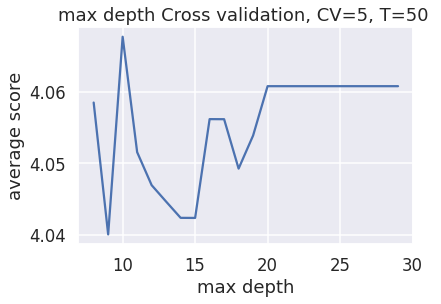

In [ ]:
import numpy as np # 引入NumPy
import seaborn as sns # 引入Seaborn
import matplotlib.pyplot as plt # 引入matplotlib的函數

x = list(avg_depth.keys())
y = list(avg_depth.values())


plt.title("max depth Cross validation, CV=5, T=50 ") # 圖的標題
plt.xlabel("max depth") # x軸的名稱
plt.ylabel("average score") # y軸的名稱
sns.set(context = "talk") # 改變線條的粗細
plt.plot(x, y) # 繪製x,y軸的圖
plt.show() # 顯現圖形

In [ ]:
 avg_leaf.values()

dict_values([4.07916203188728, 4.05614704168653, 4.049224005508764, 4.053848191111818, 4.063038296519946, 4.056115260342181, 4.05613115101435, 4.05613115101435, 4.05613115101435])

In [ ]:
location['Zip Code']

0       90022.0
1           NaN
2       90303.0
3       90602.0
4       90720.0
         ...   
6158    92285.0
6159    92301.0
6160    92304.0
6161    92305.0
6162    92308.0
Name: Zip Code, Length: 6163, dtype: float64

# 2022.1.3
linear model to handel NAN

In [ ]:
one = pd.concat([data['Zip Code'], data['Latitude']], axis=1)

one= one.dropna()
from sklearn.linear_model import LinearRegression

X = np.array(one['Zip Code'])
X = X.reshape(-1,1)
reg = LinearRegression().fit(X, one['Latitude'])

count = 0
for i in range(len(data['Latitude'])):
  if np.isnan(data['Latitude'][i]) and not np.isnan(data['Zip Code'][i]):
    new_data.loc[i,"Latitude"] = reg.predict(np.array(data['Zip Code'][i]).reshape(-1,1))
    count +=1
print(count)

243


In [ ]:
one = pd.concat([data['Zip Code'], data['Longitude']], axis=1)

one= one.dropna()
from sklearn.linear_model import LinearRegression

X = np.array(one['Zip Code'])
X = X.reshape(-1,1)
reg = LinearRegression().fit(X, one['Longitude'])

count = 0
for i in range(len(data['Longitude'])):
  if np.isnan(data['Longitude'][i]) and not np.isnan(data['Zip Code'][i]):
    new_data.loc[i,"Longitude"] = reg.predict(np.array(data['Zip Code'][i]).reshape(-1,1))
    count +=1
print(count)

NameError: ignored

In [ ]:

y_hat = reg.predict(X)

In [ ]:
sum((y_hat - test['Latitude'] )**2)/len(test['Latitude'])

1.2034024048763194

In [ ]:
sum((test['Latitude'].median() - test['Latitude'] )**2)/len(test['Latitude'])

5.945654230131693

In [ ]:
count

243

In [ ]:
sum(np.isnan(data['Latitude']))/len(data['Latitude'])

0.016114180478821363

In [ ]:
sum(np.isnan(location['Latitude']))/len(location['Latitude'])

0.12493915300989777

In [ ]:


test= pd.concat([location['Zip Code'], location['Latitude']], axis=1)

NameError: ignored

In [ ]:
sum(np.isnan(data['Total Revenue']))/len(data['Total Revenue'])

0.1252302025782689

In [ ]:
testX = data['Total Revenue'].dropna()
testY = data['Total Revenue']
from sklearn.linear_model import LinearRegression

X = np.array(data['Total Revenue'])
X = X.reshape(-1,1)
reg = LinearRegression().fit(X, data['Total Revenue'])

ValueError: ignored